<a href="https://colab.research.google.com/github/arghya53/TimeSeriesAnalysis/blob/main/Python_Time_Series_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import datetime

mpl.rcParams['figure.figsize']= (10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'


start = datetime.date(2020, 1 ,1)
end = datetime.date(2023, 10, 18)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
json_content = result.content.decode('utf-8') # converting byte data into jason string data
json_content

'{"bpi":{"2020-01-01":7188.4633,"2020-01-02":6961.5683,"2020-01-03":7346.58,"2020-01-04":7355.855,"2020-01-05":7356.3117,"2020-01-06":7761.825,"2020-01-07":8157.7617,"2020-01-08":8042.8733,"2020-01-09":7816.9233,"2020-01-10":8189.265,"2020-01-11":8016.4267,"2020-01-12":8178.8833,"2020-01-13":8105.4783,"2020-01-14":8807.4267,"2020-01-15":8808.4867,"2020-01-16":8716.9133,"2020-01-17":8890.25,"2020-01-18":8901.17,"2020-01-19":8698.5717,"2020-01-20":8631.2883,"2020-01-21":8727.6033,"2020-01-22":8661.01,"2020-01-23":8392.145,"2020-01-24":8436.49,"2020-01-25":8337.1017,"2020-01-26":8602.7417,"2020-01-27":8901.5067,"2020-01-28":9393.2733,"2020-01-29":9290.46,"2020-01-30":9508.725,"2020-01-31":9346.1333,"2020-02-01":9388.6617,"2020-02-02":9333.08,"2020-02-03":9291.6433,"2020-02-04":9175.3367,"2020-02-05":9613.4033,"2020-02-06":9750.5467,"2020-02-07":9808.5967,"2020-02-08":9897.6583,"2020-02-09":10161.2833,"2020-02-10":9852.7183,"2020-02-11":10266.1,"2020-02-12":10347.9517,"2020-02-13":10230.07

In [ ]:
data = pd.read_json(json_content).iloc[:-2,:1]
data.index.name= 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2020-01-01,7188.4633
2020-01-02,6961.5683
2020-01-03,7346.5800
2020-01-04,7355.8550
2020-01-05,7356.3117
...,...
2022-07-03,19115.5200
2022-07-04,19129.0000
2022-07-05,20205.6075


<Axes: xlabel='date'>

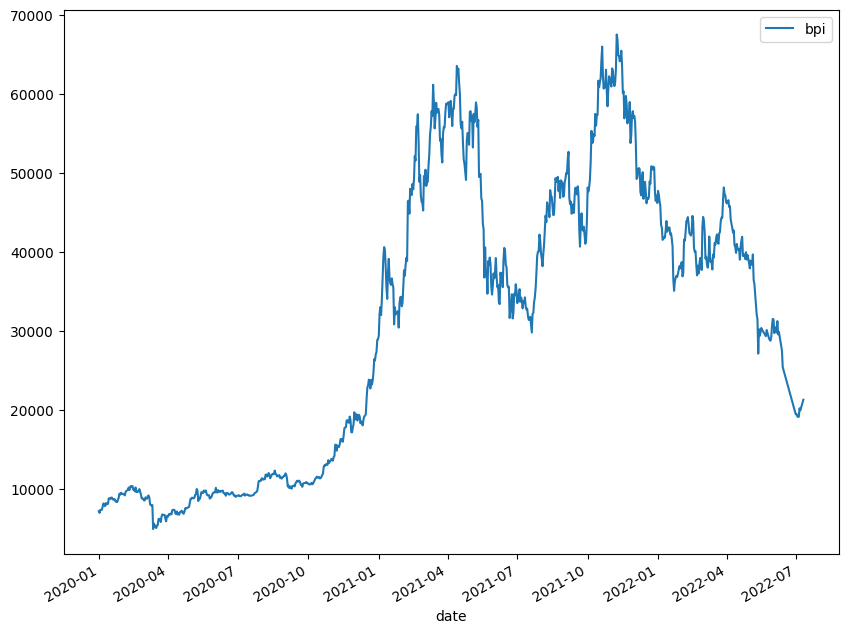

In [ ]:
data.plot()

# These are daily level data, we can resample it to monthly or weekly level data

D Calendar Day

---


B Business Day

---


W Weekly

---


M Monthly

---


Q Quarter

---

A Year end

---

H Hours

---
T Minutes

---
S Seconds




In [ ]:
data.resample('Q').mean() # quarterly data is aggregated and then mean is calculated for a quarter

,bpi
date,
2020-03-31,8273.003262
2020-06-30,8649.343719
2020-09-30,10613.818097
2020-12-31,16849.258523
2021-03-31,45278.155517
2021-06-30,46463.811776
2021-09-30,41984.219634
2021-12-31,55923.942573
2022-03-31,41305.973851


<Axes: xlabel='date'>

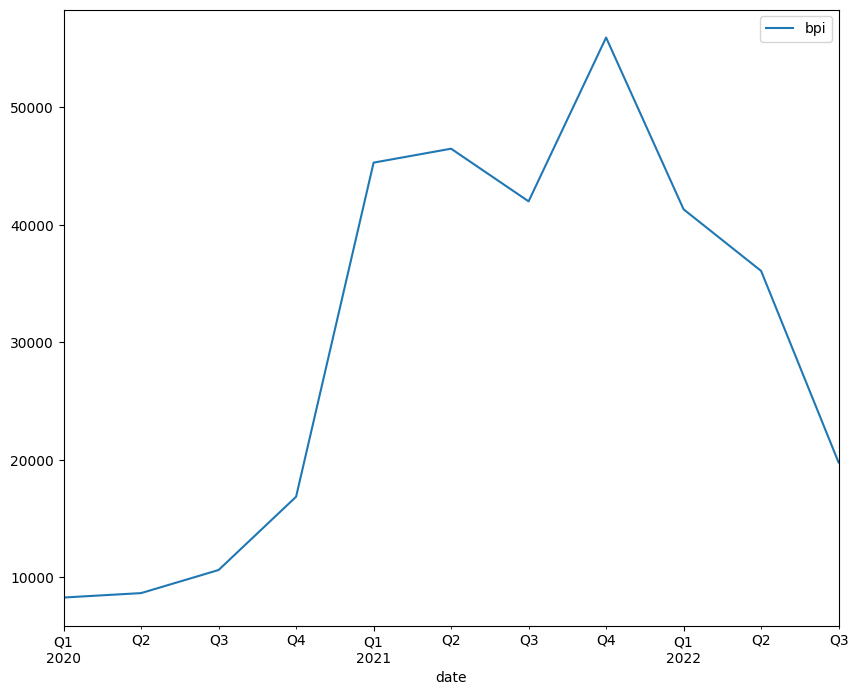

In [ ]:
data.resample('Q').mean().plot()

<Axes: xlabel='date'>

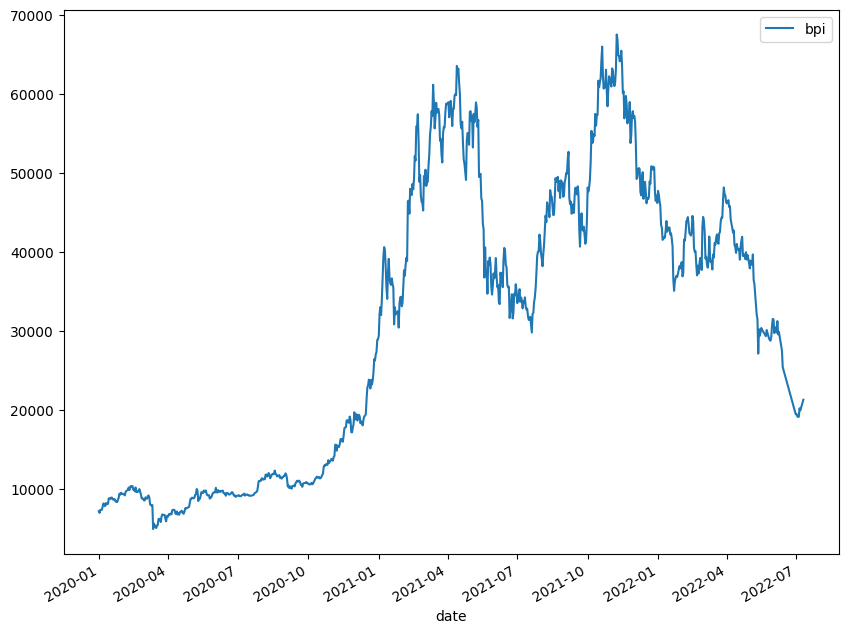

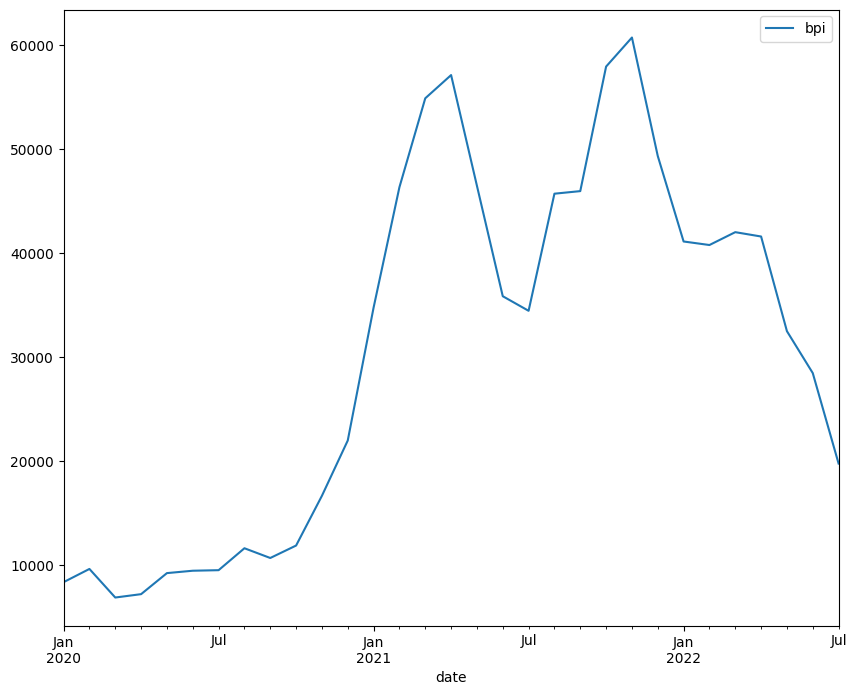

In [ ]:
data.plot()
data.resample('M').mean().plot()

In [ ]:
data

,bpi
date,
2020-01-01,7188.4633
2020-01-02,6961.5683
2020-01-03,7346.5800
2020-01-04,7355.8550
2020-01-05,7356.3117
...,...
2022-07-03,19115.5200
2022-07-04,19129.0000
2022-07-05,20205.6075


In [ ]:
data[:5].diff()

,bpi
date,
2020-01-01,NaN
2020-01-02,-226.8950
2020-01-03,385.0117
2020-01-04,9.2750
2020-01-05,0.4567


In [ ]:
data[:5].diff(2) # calculating the differences between rows that are two positions above. Second order difference

,bpi
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,158.1167
2020-01-04,394.2867
2020-01-05,9.7317


<Axes: xlabel='date'>

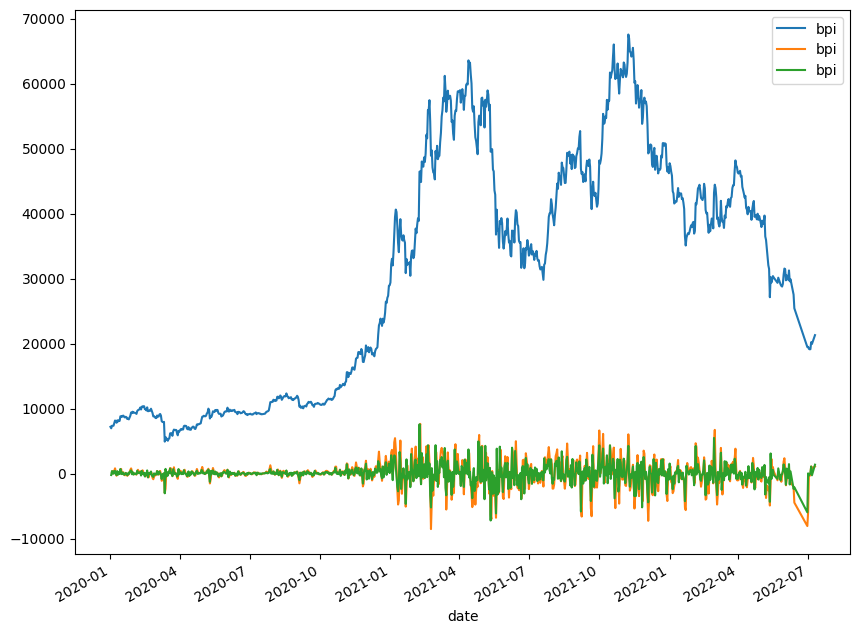

In [ ]:
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()], axis=1).plot() # concatanation is done in columns. So axis=1

From the graph we can see that the non stationary part of the curve has been removed by applying difference operation. And now ARIMA model can be applied on it.

SHIFT function shifts the data upto certain level.

In [ ]:
data.shift().head()

,bpi
date,
2020-01-01,NaN
2020-01-02,7188.4633
2020-01-03,6961.5683
2020-01-04,7346.5800
2020-01-05,7355.8550


In [ ]:
data[:5]-data[:5].shift() # We got the same output when we applied first order diff function.

,bpi
date,
2020-01-01,NaN
2020-01-02,-226.8950
2020-01-03,385.0117
2020-01-04,9.2750
2020-01-05,0.4567


In [ ]:
data[:5]-data[:5].shift(2)

,bpi
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,158.1167
2020-01-04,394.2867
2020-01-05,9.7317


In [ ]:
pd.concat([data, data-data.shift(), data.tshift(365)], axis=1).plot()

<ipython-input-40-47f6ed1c4d01>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  pd.concat([data, data-data.shift(), data.tshift(365)], axis=1).plot()


ValueError: ignored

<Axes: xlabel='date'>

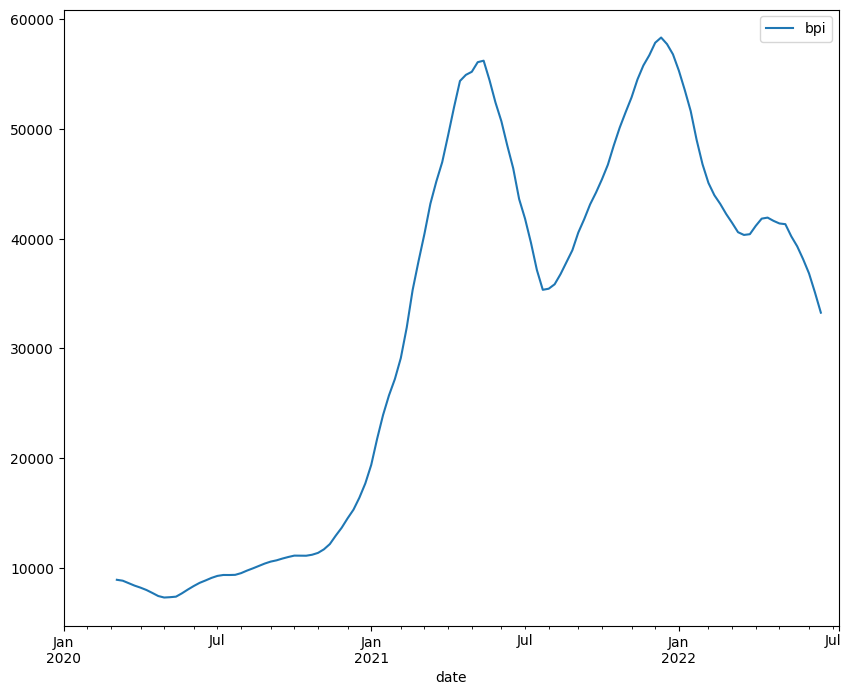

In [ ]:
# When we calculate frequency of an event in a particular time window, we use rolling window
# If window is 10, then it takes the average of last 10 time units of the data
data.resample('W').mean().rolling(window=10).mean().plot()

# here day level data is resampled into week level, then window is agreegating 10 weeks data and plotting the mean data of that span

<Axes: xlabel='date'>

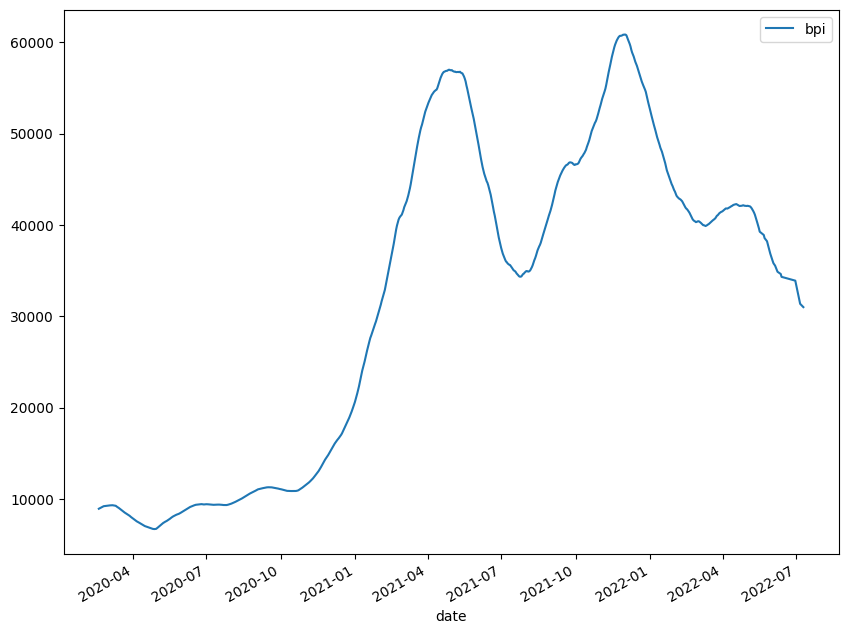

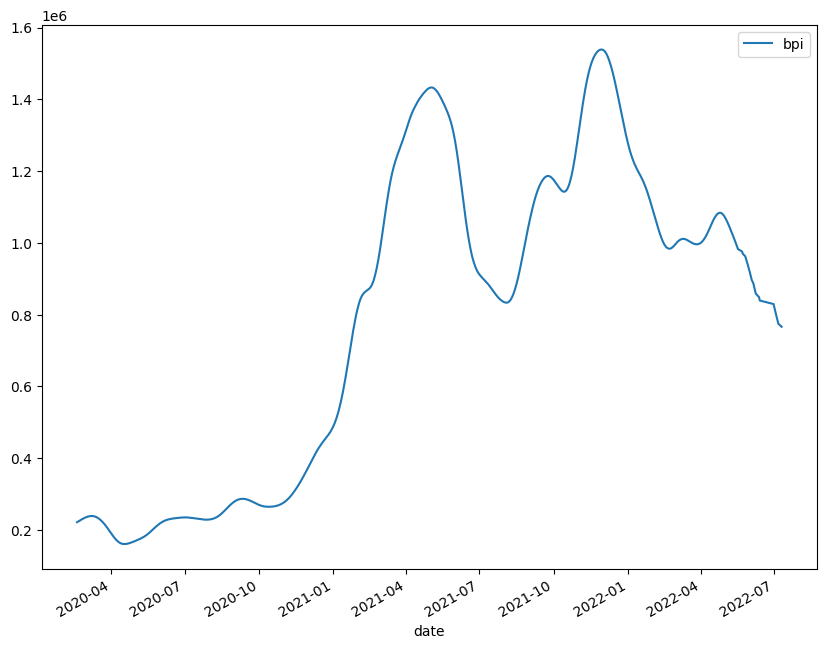

In [ ]:
data.rolling(window=50).mean().plot()
data.rolling(window=50, win_type='gaussian').sum(std=10).plot()

<Axes: xlabel='date'>

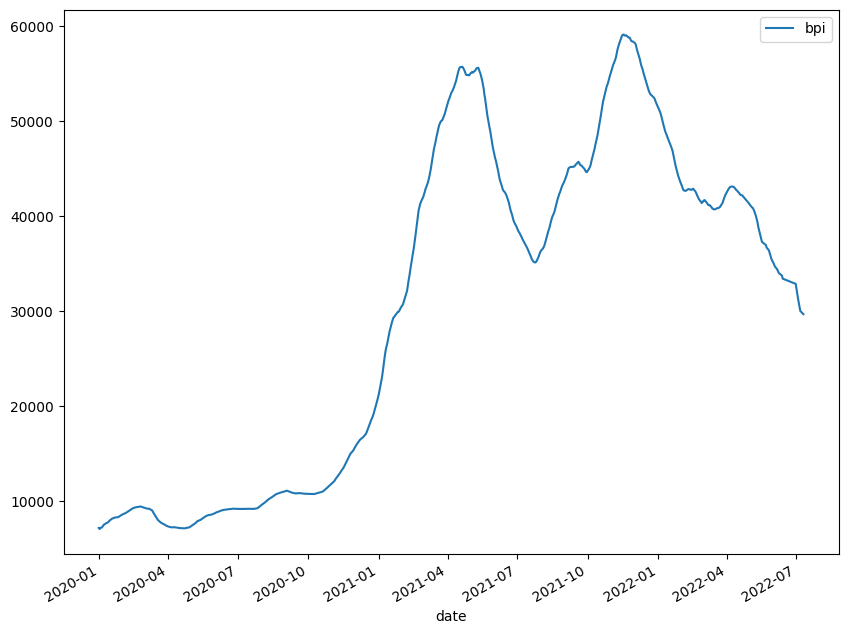

In [ ]:
data.ewm(span=50).mean().plot() # it is more close to the actual plot

<Axes: xlabel='date'>

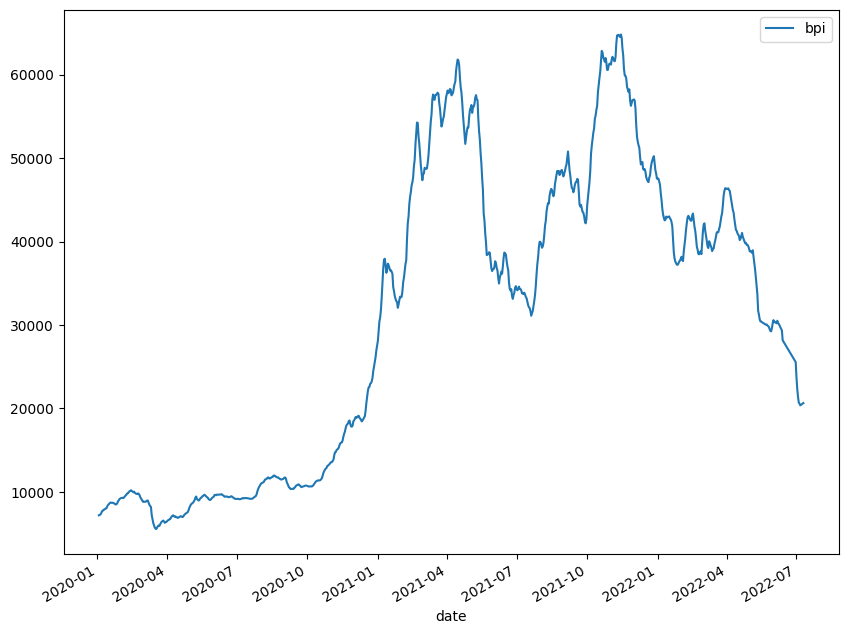

In [ ]:
data_esm = data.ewm(alpha=0.3, adjust=False, min_periods=3).mean()
data_esm.plot()

<Axes: xlabel='date'>

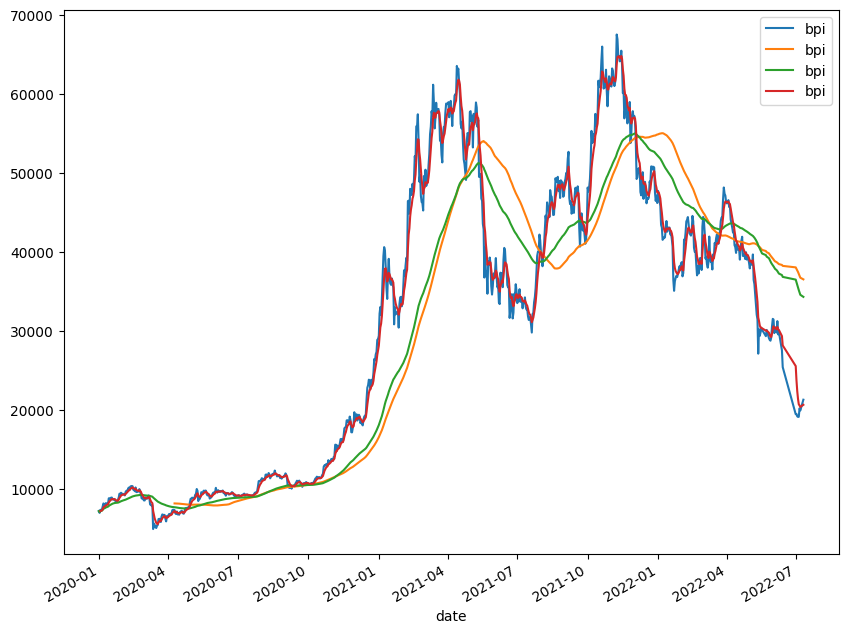

In [ ]:
pd.concat([data, data.rolling(window=100).mean(), data.ewm(span=100).mean(),data.ewm(alpha=0.3, adjust=False, min_periods=3).mean()],axis=1).plot()

We can see that the data_esm closely follows the actual data.

In [ ]:
data_esm.head()

,bpi
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,7188.250360
2020-01-04,7238.531752
2020-01-05,7273.865736


In [ ]:
data.head()

,bpi
date,
2020-01-01,7188.4633
2020-01-02,6961.5683
2020-01-03,7346.5800
2020-01-04,7355.8550
2020-01-05,7356.3117


In [ ]:
(((data-data_esm)**2).mean())**.5

bpi    1365.554036
dtype: float64

In [ ]:
data.groupby(data.index.dayofweek).mean()

,bpi
date,
0,30913.025330
1,31021.735116
2,30935.814364
3,30816.093419
4,30844.391467
5,30877.823750
6,30765.511385


In [ ]:
data.groupby(data.index.month).mean()

,bpi
date,
1,28076.477382
2,31975.353859
3,34584.918983
4,35297.439813
5,29180.834702
6,23485.261301
7,21757.390988
8,28662.156900
9,28317.654407


In [ ]:
data.groupby(data.index.year).mean()

,bpi
date,
2020,11110.755804
2021,47426.826825
2022,38272.003020


In [ ]:
data[:5].cumsum() # cumulative sum

,bpi
date,
2020-01-01,7188.4633
2020-01-02,14150.0316
2020-01-03,21496.6116
2020-01-04,28852.4666
2020-01-05,36208.7783


In [ ]:
data[:5].pct_change(2) # percentage change from data above two rows

,bpi
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,0.021996
2020-01-04,0.056638
2020-01-05,0.001325


In [ ]:
data.expanding().sum()

,bpi
date,
2020-01-01,7.188463e+03
2020-01-02,1.415003e+04
2020-01-03,2.149661e+04
2020-01-04,2.885247e+04
2020-01-05,3.620878e+04
...,...
2022-07-03,2.749683e+07
2022-07-04,2.751596e+07
2022-07-05,2.753617e+07


In [ ]:
data.expanding().mean()

,bpi
date,
2020-01-01,7188.463300
2020-01-02,7075.015800
2020-01-03,7165.537200
2020-01-04,7213.116650
2020-01-05,7241.755660
...,...
2022-07-03,30930.069119
2022-07-04,30916.809491
2022-07-05,30904.787940
